In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [2]:
%matplotlib inline

## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60&deg; F or warmer than 100&deg; F.

In [3]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df_gc = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95&deg; F, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning?

In [4]:
df_gc

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [5]:
input_data = df_gc[['Ground Temperature']]
output_data = df_gc['Chirps/Second']

In [6]:
regr1 = linear_model.LinearRegression()
regr1.fit(input_data, output_data)

print(regr1.coef_, regr1.intercept_)

[ 0.20299973] 0.459314645236


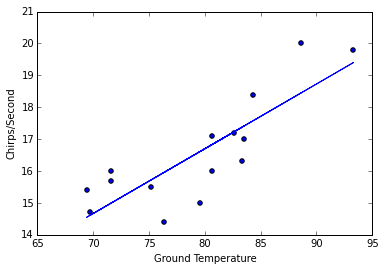

In [7]:
plt.scatter(input_data, output_data)
plt.plot(input_data, regr1.predict(input_data))
plt.xlabel('Ground Temperature')
plt.ylabel('Chirps/Second')
plt.show()

In [8]:
print(regr1.score(input_data, output_data))

0.692294652915


The above data for the change in the number of chirps per second as the temperature changes has an $R^2$ score of 0.69. This $R^2$ score is below 0.8 and therefore the data does not show a strong correlation.

#### Extrapolate data: If the ground temperature reached 95° F, then at what approximate rate would you expect the crickets to be chirping?

In [9]:
# Extrapolate data
print(regr1.predict(95))

[ 19.74428913]


#### Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

In [10]:
# Interpolate data
print((18 - regr1.intercept_) / regr1.coef_)

[ 86.40743135]


## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [11]:
df_bb = pd.read_fwf("brain_body.txt")

In [12]:
df_bb.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [13]:
input_data2 = df_bb[['Brain']]
output_data2 = df_bb['Body']

In [14]:
regr2 = linear_model.LinearRegression()
regr2.fit(input_data2, output_data2)

print(regr2.coef_, regr2.intercept_)

print(regr2.score(input_data2, output_data2))

[ 0.96649637] 91.0043962074
0.872662084304


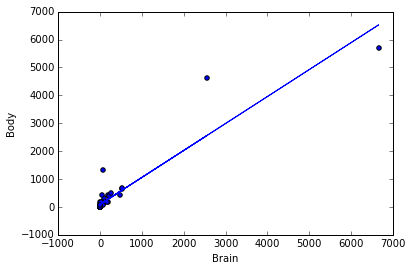

In [15]:
plt.scatter(input_data2, output_data2)
plt.plot(input_data2, regr2.predict(input_data2))
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show()

The above data for brain weight vs. body weight has an $R^2$ score over 0.87. This means the data shows a strong correlation between brain weight and body weight.

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary. Support your argument with graph(s) if appropriate.

In [16]:
df_sd = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [17]:
df_sd.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


#### Find the linear regression equation for the data using columns 1-5 to column 6.

Men and Women

In [18]:
input_data3 = df_sd[['Sex', 'Rank', 'Year', 'Degree','YSdeg']]

output_data3 = df_sd['Salary']

In [19]:
regr3 = linear_model.LinearRegression()
regr3.fit(input_data3, output_data3)
print(regr3.coef_, regr3.intercept_)

[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341  -128.79057354] 11410.1465473


In [20]:
print(regr3.score(input_data3, output_data3))

0.854718067441


Women

In [21]:
df_w = df_sd.Sex == 1

In [22]:
df_w = df_sd[df_w]

In [23]:
df_w.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
3,1,3,7,1,27,26775
6,1,3,0,0,32,24900
23,1,3,8,1,24,38045
27,1,3,5,1,16,25500
30,1,1,10,0,15,21600


In [24]:
input_data_w = df_w[['Rank', 'Year', 'Degree','YSdeg']]

output_data_w = df_w['Salary']

In [25]:
regr_w = linear_model.LinearRegression()
regr_w.fit(input_data_w, output_data_w)
print(regr_w.coef_, regr_w.intercept_)

[ 6062.80005435   677.39497138   -60.40724015  -107.20344049] 9818.71878782


In [26]:
print(regr_w.score(input_data_w, output_data_w))

0.779683396742


Men

In [27]:
df_m = df_sd.Sex == 0

In [28]:
df_m = df_sd[df_m]

In [29]:
df_m.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516


In [30]:
input_data_m = df_m[['Rank', 'Year', 'Degree','YSdeg']]

output_data_m = df_m['Salary']

In [31]:
regr_m = linear_model.LinearRegression()
regr_m.fit(input_data_m, output_data_m)
print(regr_m.coef_, regr_m.intercept_)

[ 5452.03218827   505.03876881 -1683.98281158  -161.65491866] 12275.8326397


In [32]:
print(regr_m.score(input_data_m, output_data_m))

0.886018044702


In [33]:
print('Men and Women', regr3.score(input_data3, output_data3))
print('Women', regr_w.score(input_data_w, output_data_w))
print('Men', regr_m.score(input_data_m, output_data_m))

Men and Women 0.854718067441
Women 0.779683396742
Men 0.886018044702


The data above shows a higher $R^2$ score between the salary the male professors were paid and their rank, the number of years in current rank, their highest degree earned, and the years since highest degree was earned, than of the female professors. The male professors $R^2$ score was .89 showing a strong correlation while the female professors had a $R^2$ score of .78 which falls below the .80 threshold for a strong correlation. This points to a stonger correlation between salary and the factors considered for males than females. The $R^2$ score when all factors were compared to salary was 0.85. This shows a strong correlation.

#### Find the selection of columns with the best $R^2$ score.

#### Report whether sex is a factor in salary. Support your argument with graph(s) if appropriate.

In [34]:
input_data_w_r = df_w[['Rank']]
output_data_w_r = df_w['Salary']

input_data_m_r = df_m[['Rank']]
output_data_m_r = df_m['Salary']

input_data_w_y = df_w[['Year']]
output_data_w_y = df_w['Salary']

input_data_m_y = df_m[['Year']]
output_data_m_y = df_m['Salary']

input_data_w_d = df_w[['Degree']]
output_data_w_d = df_w['Salary']

input_data_m_d = df_m[['Degree']]
output_data_m_d = df_m['Salary']

input_data_w_ys = df_w[['YSdeg']]
output_data_w_ys = df_w['Salary']

input_data_m_ys = df_m[['YSdeg']]
output_data_m_ys = df_m['Salary']

$R^2$ Scores

In [35]:
regr_w_r = linear_model.LinearRegression()
regr_w_r.fit(input_data_w_r, output_data_w_r)

print('Female Rank:', regr_w_r.score(input_data_w_r, output_data_w_r))

regr_m_r = linear_model.LinearRegression()
regr_m_r.fit(input_data_m_r, output_data_m_r)

print('Male Rank:', regr_m_r.score(input_data_m_r, output_data_m_r))

Female Rank: 0.674144414566
Male Rank: 0.767269427883


In [36]:
regr_w_y = linear_model.LinearRegression()
regr_w_y.fit(input_data_w_y, output_data_w_y)

print('Female Year:', regr_w_y.score(input_data_w_y, output_data_w_y))

regr_m_y = linear_model.LinearRegression()
regr_m_y.fit(input_data_m_y, output_data_m_y)

print('Male Year:', regr_m_y.score(input_data_m_y, output_data_m_y))

Female Year: 0.237245116824
Male Year: 0.550855421296


In [37]:
regr_w_d = linear_model.LinearRegression()
regr_w_d.fit(input_data_w_d, output_data_w_d)

print('Female Degree:', regr_w_d.score(input_data_w_d, output_data_w_d))

regr_m_d = linear_model.LinearRegression()
regr_m_d.fit(input_data_m_d, output_data_m_d)

print('Male Degree:', regr_m_d.score(input_data_m_d, output_data_m_d))

Female Degree: 0.0126173700228
Male Degree: 0.000904154548697


In [38]:
regr_w_ys = linear_model.LinearRegression()
regr_w_ys.fit(input_data_w_ys, output_data_w_ys)

print('Female YSdeg:', regr_w_ys.score(input_data_w_ys, output_data_w_ys))

regr_m_ys = linear_model.LinearRegression()
regr_m_ys.fit(input_data_m_ys, output_data_m_ys)

print('Male YSdeg:', regr_m_ys.score(input_data_m_ys, output_data_m_ys))

Female YSdeg: 0.40336500686
Male YSdeg: 0.492779236906


Data Extrapolated

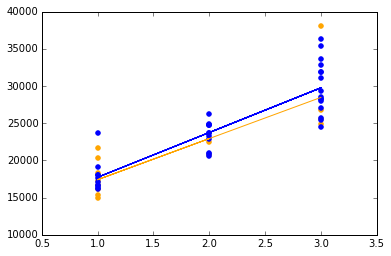

In [39]:
plt.scatter(input_data_w_r, output_data_w_r, color='orange')
plt.scatter(input_data_m_r, output_data_m_r, color='blue')
plt.plot(input_data_w_r, regr_w_r.predict(input_data_w_r), color='orange')
plt.plot(input_data_m_r, regr_m_r.predict(input_data_m_r), color='blue')
plt.show()

In [40]:
#Extrapolate rank to 3, the max
print('Female Rank:', regr_w_r.predict(3))
print('Male Rank:', regr_m_r.predict(3))

Female Rank: [ 28463.42105263]
Male Rank: [ 29758.37815126]


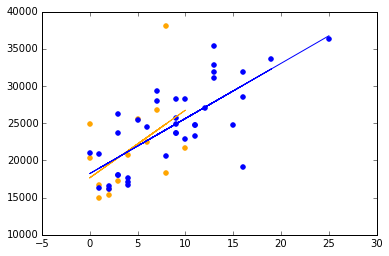

In [41]:
plt.scatter(input_data_w_y, output_data_w_y, color='orange')
plt.scatter(input_data_m_y, output_data_m_y, color='blue')
plt.plot(input_data_w_y, regr_w_y.predict(input_data_w_y), color='orange')
plt.plot(input_data_m_y, regr_m_y.predict(input_data_m_y), color='blue')
plt.show()

In [42]:
#Extrapolate data to 25 years at current rank
print('Female Year:', regr_w_y.predict(25))
print('Male Year:', regr_m_y.predict(25))

Female Year: [ 40403.75519513]
Male Year: [ 36748.17283402]


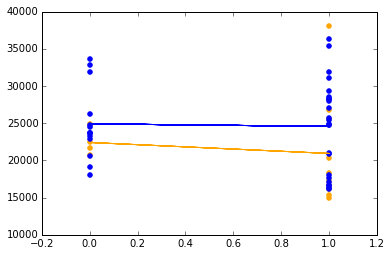

In [43]:
plt.scatter(input_data_w_d, output_data_w_d, color='orange')
plt.scatter(input_data_m_d, output_data_m_d, color='blue')
plt.plot(input_data_w_d, regr_w_d.predict(input_data_w_d), color='orange')
plt.plot(input_data_m_d, regr_m_d.predict(input_data_m_d), color='blue')
plt.show()

In [44]:
#Extrapolate rank to 1
print('Female Year:', regr_w_d.predict(1))
print('Male Year:', regr_m_d.predict(1))

Female Year: [ 20936.]
Male Year: [ 24568.83333333]


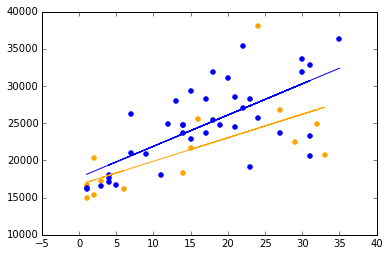

In [45]:
plt.scatter(input_data_w_ys, output_data_w_ys, color='orange')
plt.scatter(input_data_m_ys, output_data_m_ys, color='blue')
plt.plot(input_data_w_ys, regr_w_ys.predict(input_data_w_ys), color='orange')
plt.plot(input_data_m_ys, regr_m_ys.predict(input_data_m_ys), color='blue')
plt.show()

In [46]:
#Extrapolate years since highest degree was earned to 25 years
print('Female Year:', regr_w_ys.predict(35))
print('Male Year:', regr_m_ys.predict(35))

Female Year: [ 27787.04244318]
Male Year: [ 32396.7211217]


When the different factors are compared to the salary given to male or female professors and that data is extrapolated to roughly the maximum value we see that males have a higher predicted pay in every factor accept the number of years at the current rank. Salary compared to the rank of the professor had the highest $R^2$ score, when that data was extrapolated to a rank of 3, male professors only slightly outearned female professors. When all the above data is considered it points towards males professors receiving a higher salary than female professors when the same benchmarks are used as a comparison. The low $R^2$ scores for these correlations points to their being little statistical relevance to the higher male pay.